In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

In [2]:
'''Import '../Resources?[File.csv]'
merg csv files at Zipe Code '''
# Read the home data from CSV

analysis_df = pd.read_csv('Resources/merged_all_df.csv')

analysis_df = analysis_df.drop(columns=["Unnamed: 0"])
print(analysis_df.head())

   Year  ZipCode  Population  Poverty Count  Poverty Rate  \
0  2014    95608     60729.0         8301.0         13.67   
1  2014    95610     43572.0         7174.0         16.46   
2  2014    95621     41474.0         5842.0         14.09   
3  2014    95624     63131.0         6848.0         10.85   
4  2014    95626      6335.0          792.0         12.50   

   Family Poverty Count  Median Household Income  Per Capita Income  \
0                1476.0                  55256.0            34606.0   
1                1136.0                  50536.0            25288.0   
2                1069.0                  51827.0            24379.0   
3                1266.0                  80233.0            29752.0   
4                 182.0                  60579.0            22576.0   

   Median Home Value      PC  
0           304200.0  1745.0  
1           217100.0     8.0  
2           173700.0    38.0  
3           270400.0     6.0  
4           193900.0    70.0  


In [3]:
# Group by year for median home values all of Sac County

analysis_df_groupby = analysis_df.groupby('Year', as_index=True)
analysis_df_groupby.median()

,ZipCode,Population,Poverty Count,Poverty Rate,Family Poverty Count,Median Household Income,Per Capita Income,Median Home Value,PC
Year,,,,,,,,,
2014,95817,29781.0,4621.0,14.90,797.0,55827.0,25573.0,233800.0,61.5
2015,95817,30053.0,4237.0,16.54,724.0,54568.0,26107.0,237700.0,74.0
2016,95817,30225.0,4212.0,15.78,645.0,55772.0,27174.0,258700.0,79.5
2017,95817,30935.0,3578.0,14.68,611.0,58108.0,27464.0,290600.0,50.0
2018,95817,30296.0,3828.0,14.05,658.0,62604.0,29377.0,323800.0,88.0


In [4]:
# Define sac county  Median home values

analysis_df_groupby_median=analysis_df_groupby.median()
sac_county_median_home_df  = analysis_df_groupby_median.reset_index()
sac_county_median_home_df 

,Year,ZipCode,Population,Poverty Count,Poverty Rate,Family Poverty Count,Median Household Income,Per Capita Income,Median Home Value,PC
0,2014,95817,29781.0,4621.0,14.90,797.0,55827.0,25573.0,233800.0,61.5
1,2015,95817,30053.0,4237.0,16.54,724.0,54568.0,26107.0,237700.0,74.0
2,2016,95817,30225.0,4212.0,15.78,645.0,55772.0,27174.0,258700.0,79.5
3,2017,95817,30935.0,3578.0,14.68,611.0,58108.0,27464.0,290600.0,50.0
4,2018,95817,30296.0,3828.0,14.05,658.0,62604.0,29377.0,323800.0,88.0


In [5]:
# oakpark median home values
oak_park_df = analysis_df.loc[(analysis_df["ZipCode"] == 95817) | (analysis_df["ZipCode"] == 95820)]
oak_park_median_home_value = oak_park_df.groupby('Year').median()
oak_park_median_home_value = oak_park_median_home_value.reset_index('Year')
oak_park_median_home_value 

,Year,ZipCode,Population,Poverty Count,Poverty Rate,Family Poverty Count,Median Household Income,Per Capita Income,Median Home Value,PC
0,2014,95818.5,24500.5,7070.0,30.170,1121.0,37787.5,21887.5,196200.0,172.0
1,2015,95818.5,24621.5,6879.0,28.615,1102.0,37394.0,21945.5,195400.0,214.0
2,2016,95818.5,24893.5,7002.5,28.780,1098.0,40918.5,22336.5,213900.0,135.5
3,2017,95818.5,24950.5,6161.0,25.415,853.5,45106.5,24505.5,246900.0,102.0
4,2018,95818.5,24469.0,5797.5,23.450,836.0,47720.5,26205.0,273900.0,245.0


In [6]:
# Merge Sac County with Oak Park on year and Median Home Value

median_home_values_df = pd.merge(sac_county_median_home_df, oak_park_median_home_value, on="Year", how='outer')
median_home_values_df.drop(columns=['ZipCode_x','Population_x','Poverty Count_x',
                                    'Poverty Rate_x','Family Poverty Count_x','Per Capita Income_x',
                                    'Median Household Income_x','PC_x', 'ZipCode_y','Population_y','Poverty Count_y',
                                    'Poverty Rate_y', 'Family Poverty Count_y', 'Median Household Income_y','PC_y',
                                    'Per Capita Income_y'
                                   ], inplace=True)
median_home_values_df=median_home_values_df.rename(columns={'Median Home Value_x': 'Sac County Median Home Values',
                                                           'Median Home Value_y': 'Oak Park Mediam Home Values'})
median_home_values_df

,Year,Sac County Median Home Values,Oak Park Mediam Home Values
0,2014,233800.0,196200.0
1,2015,237700.0,195400.0
2,2016,258700.0,213900.0
3,2017,290600.0,246900.0
4,2018,323800.0,273900.0


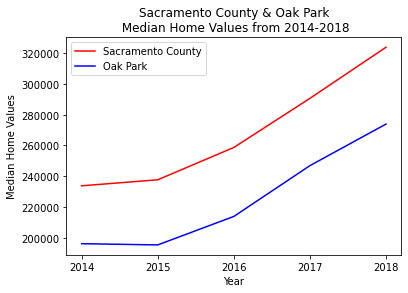

In [7]:
#Plot Median home values over time

year = median_home_values_df['Year'].astype(str)
sac = median_home_values_df['Sac County Median Home Values']
oak = median_home_values_df['Oak Park Mediam Home Values']

sac, = plt.plot(year, sac, color='red', label='Sacramento County')
oak, = plt.plot(year, oak, color='blue', label='Oak Park')

plt.title('Sacramento County & Oak Park\n Median Home Values from 2014-2018')
plt.xlabel('Year')
plt.ylabel('Median Home Values')

plt.legend(handles=[sac,oak],loc='best')
plt.savefig('Images/Median_Home_Values_SacvOak_Park_pyplot.png')

plt.show()